# Anomaly and warming stripes
Let us begin by finding the typical temperature between 2030 and 2060.

In [0]:

%sql
SELECT AVG(prediction) AS typical_sst
FROM long_prediction
WHERE YEAR(date) BETWEEN YEAR(DATE("2029-01-01")) AND YEAR(DATE("2061-01-01"))

typical_sst
20.84838530386781


As we can see from the previous cell, the typical temperature between years 2030 and 2060 is 20.8 Celsius. From which, we can then find the anomalies:

In [0]:
%sql
SELECT YEAR(date) AS year, AVG(prediction)-20.85 AS avg_global_sst
FROM long_prediction
GROUP BY year
ORDER BY year

year,avg_global_sst
2017,-0.931108090202212
2018,-1.2800334222436582
2019,-1.2599444867628549
2020,-1.1844579505175794
2021,-1.1649662745065719
2022,-1.0887608780462763
2023,-1.0681783871467871
2024,-0.9928499038501002
2025,-0.9731870281129673
2026,-0.897287897508523


We then apply a normal distribution randomness to these anomalies.

In [0]:
anomalies = _sqldf

In [0]:
import scipy.stats as sp
df = anomalies.toPandas()

def normal(x):
    random = sp.norm(0,0.5).rvs()
    return x+random

df["avg_global_sst"] = df["avg_global_sst"].apply(normal)
df.display(5)

year,avg_global_sst
2017,-0.3787822078929176
2018,-1.2995768336016296
2019,-0.9965743945605556
2020,-1.219002961725911
2021,-1.5656833286877456
2022,-1.2270365602004178
2023,-1.3891527875605756
2024,-1.8964882453276153
2025,-0.995972824540093
2026,-1.1549001010673707


Finally, we recreate the warming stripes figure using this data.

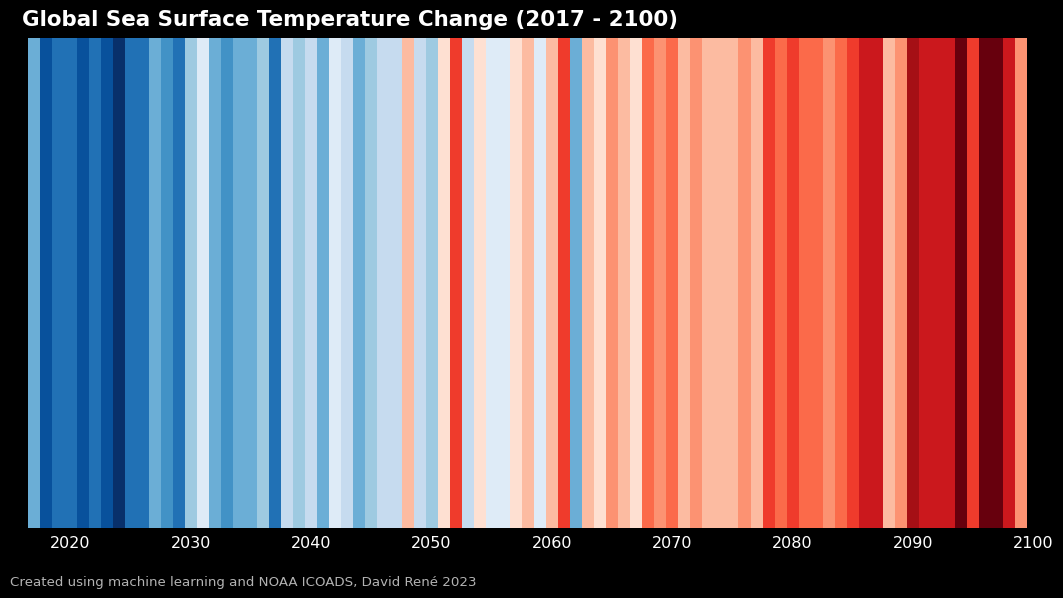

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Colours - Choose the colour map - 8 blues and 8 reds
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d'])

# linearly normalizes data into the [0.0, 1.0] interval
norm = mpl.colors.Normalize(df['avg_global_sst'].min(), df['avg_global_sst'].max())

# Plot bars
bar = ax.bar(df['year'], 1, color=cmap(norm(df['avg_global_sst'])), width=1, zorder=2)
# Remove the spines
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_xlim([df['year'].min()-1, df['year'].max()+1])

# Reformat y-axis label and tick labels
ax.set_ylabel('', fontsize=12, labelpad=10)
ax.set_yticks([])
ax.set_ylim([0, 1]) 

# Adjust the margins around the plot area
plt.subplots_adjust(left=0.1, right=None, top=None, bottom=0.2, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')
ax.patch.set_facecolor('white')
# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0, labelcolor='white')
ax.set_xlim([df['year'].min()-1, df['year'].max()+1])

# Set source text
ax.text(x=0.1, y=0.12, s="Created using machine learning and NOAA ICOADS, David René 2023", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7, color='white')

# Set graph title
ax.set_title('Global Sea Surface Temperature Change (2017 - 2100)', loc='left', color='white', fontweight="bold", size=16, pad=10)

# Adjust the margins around the plot area
plt.subplots_adjust(left=0.11, right=None, top=None, bottom=0.2, wspace=None, hspace=None)

# Set a black background
fig.patch.set_facecolor('black')
ax.patch.set_facecolor('black')

We then recreate the warming stripes for the years 1850-2017 using NOAA ICOADS data so that we can do proper comparison.

In [0]:
%sql
SELECT AVG(avg_global_sst) AS typical_sst
FROM noaa_icoads_agg
WHERE YEAR(date) BETWEEN YEAR(DATE("1970-01-01")) AND YEAR(DATE("2001-01-01"))

typical_sst
18.43785872687043


In [0]:
%sql
SELECT YEAR(date) AS year, AVG(avg_global_sst)-18.44 AS avg_global_sst
FROM noaa_icoads_agg
GROUP BY year
HAVING year > YEAR(DATE("1849-01-01"))
ORDER BY year

year,avg_global_sst
1850,1.3331231368730236
1851,1.963831680640265
1852,2.3133972386677186
1853,1.7515663426213948
1854,2.190512120534404
1855,2.7819290691171084
1856,2.7993397201010843
1857,2.154533469188074
1858,2.4148229917303183
1859,2.504979251812717


In [0]:
anomalies = _sqldf
df = anomalies.toPandas()

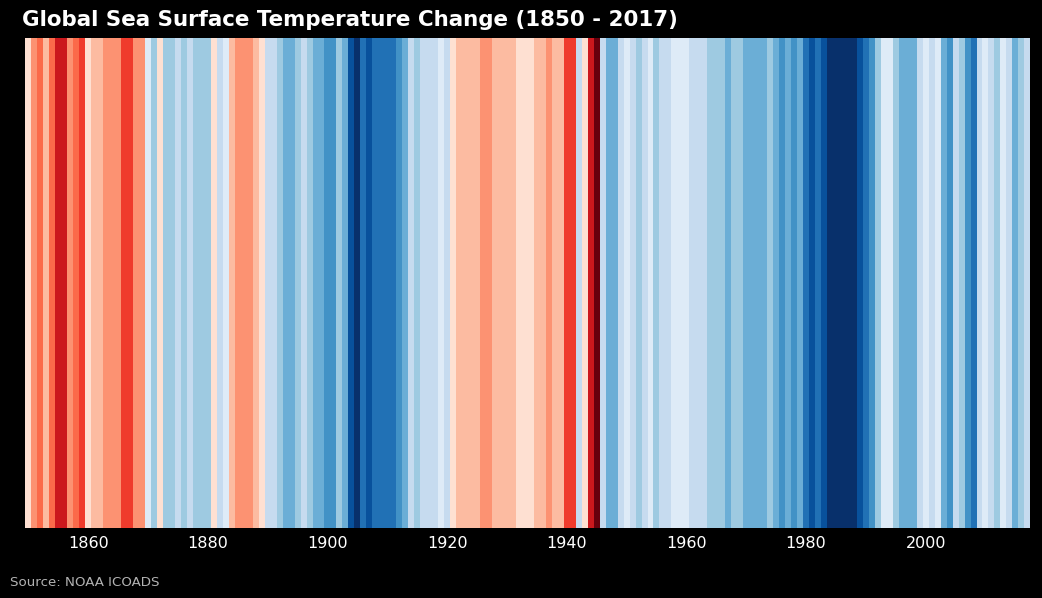

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Colours - Choose the colour map - 8 blues and 8 reds
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d'])

# linearly normalizes data into the [0.0, 1.0] interval
norm = mpl.colors.Normalize(df['avg_global_sst'].min(), df['avg_global_sst'].max())

# Plot bars
bar = ax.bar(df['year'], 1, color=cmap(norm(df['avg_global_sst'])), width=1, zorder=2)
# Remove the spines
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_xlim([df['year'].min()-1, df['year'].max()+1])

# Reformat y-axis label and tick labels
ax.set_ylabel('', fontsize=12, labelpad=10)
ax.set_yticks([])
ax.set_ylim([0, 1]) 

# Adjust the margins around the plot area
plt.subplots_adjust(left=0.1, right=None, top=None, bottom=0.2, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')
ax.patch.set_facecolor('white')
# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0, labelcolor='white')
ax.set_xlim([df['year'].min()-1, df['year'].max()+1])

# Set source text
ax.text(x=0.1, y=0.12, s="Source: NOAA ICOADS", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7, color='white')

# Set graph title
ax.set_title('Global Sea Surface Temperature Change (1850 - 2017)', loc='left', color='white', fontweight="bold", size=16, pad=10)

# Adjust the margins around the plot area
plt.subplots_adjust(left=0.11, right=None, top=None, bottom=0.2, wspace=None, hspace=None)

# Set a black background
fig.patch.set_facecolor('black')
ax.patch.set_facecolor('black')